In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
data.shape

(768, 9)

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Checking for values recorderd as '0'

In [7]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in col:
    print((data[i] == 0).value_counts())
    

Pregnancies
False    657
True     111
Name: count, dtype: int64
Glucose
False    763
True       5
Name: count, dtype: int64
BloodPressure
False    733
True      35
Name: count, dtype: int64
SkinThickness
False    541
True     227
Name: count, dtype: int64
Insulin
False    394
True     374
Name: count, dtype: int64
BMI
False    757
True      11
Name: count, dtype: int64
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64
Age
False    768
Name: count, dtype: int64
Outcome
True     500
False    268
Name: count, dtype: int64


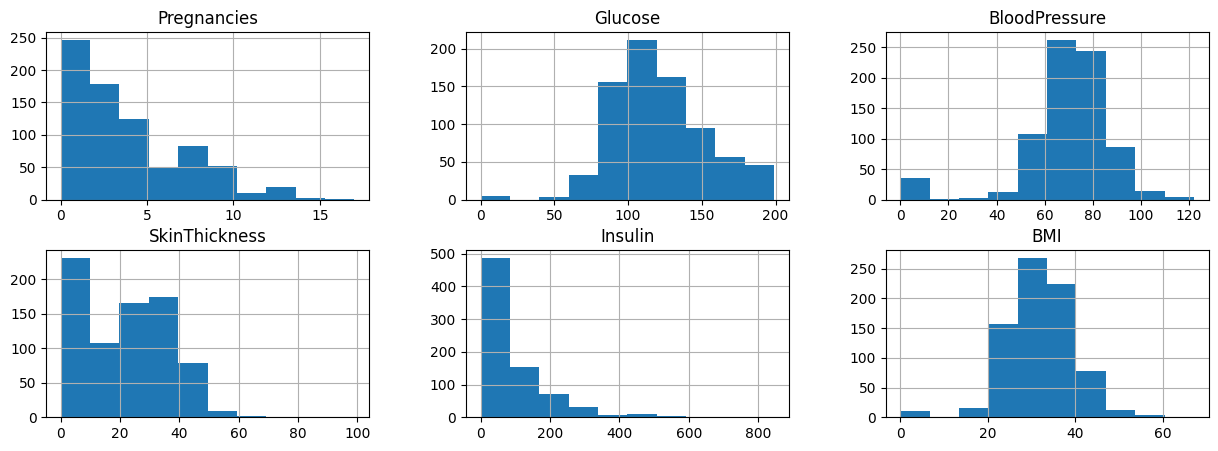

In [8]:
col_hist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
fig, axis = plt.subplots(2,3, figsize =(15,5))
data.hist(ax = axis, column=col_hist)
plt.show();

#### Treating 0 as missing value in Columns except Pregnancies and Outcome

In [9]:
zero_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

for i in zero_col:
    data[i].replace(0, np.nan, inplace=True) 

#### Handling NaN values


In [10]:
zero_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for i in zero_col:
    data[i].fillna(data[i].median(), inplace=True)

<Axes: >

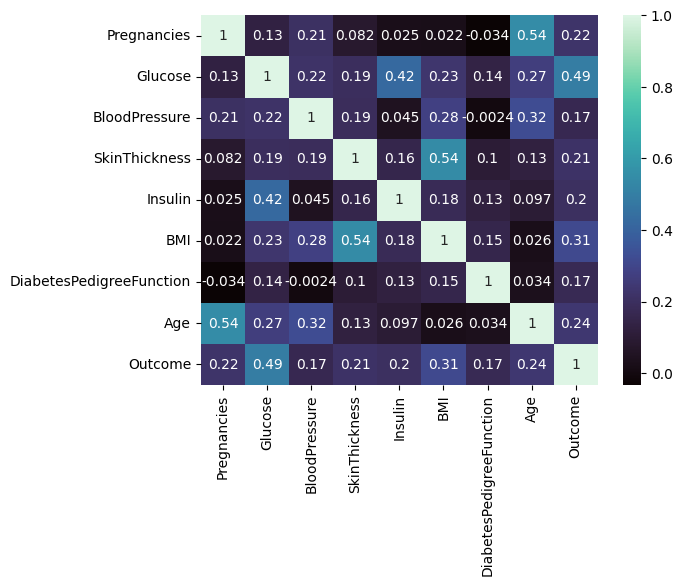

In [11]:
sns.heatmap(data.corr(), annot = True, cmap = 'mako')

### Scaling

1) Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [13]:
data_scl = data.copy()
col_to_scale  = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
data_scl[col_to_scale] = SC.fit_transform(data_scl[col_to_scale])

2. Min Max Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()

In [15]:
data_mmscl = data.copy()
col_to_scale  = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
data_mmscl[col_to_scale] = MMS.fit_transform(data_mmscl[col_to_scale])

#### Spliiting into testing and Training data

In [16]:
x_scl = data_scl.drop(columns='Outcome', axis = 1)
x_mmscl = data_mmscl.drop(columns='Outcome', axis = 1)
y = data['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
x_scl_train, x_scl_test, y_train, y_test = train_test_split(x_scl, y, random_state=42, test_size=0.2)

In [18]:
x_mmscl_train, x_mmscl_test, y_train, y_test = train_test_split(x_mmscl, y, random_state=42, test_size=0.2)

### Modeling

##### 1) Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [20]:
from sklearn.linear_model import LogisticRegression
Log_scl = LogisticRegression()
Log_scl.fit(x_scl_train, y_train)
y_pred = Log_scl.predict(x_scl_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [21]:
confusion_matrix(y_test, y_pred)

array([[82, 17],
       [21, 34]], dtype=int64)

In [22]:
from sklearn.linear_model import LogisticRegression
Log_mmscl = LogisticRegression()
Log_mmscl.fit(x_mmscl_train, y_train)
y_pred = Log_mmscl.predict(x_mmscl_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

In [23]:
confusion_matrix(y_test, y_pred)

array([[87, 12],
       [22, 33]], dtype=int64)

Min-Max Scaled data  gives a better model 

##### 2. KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k_met = []
n = np.arange(3,20)
for k in n:
    classifier = KNeighborsClassifier(n_neighbors= k , metric='euclidean')
    classifier.fit(x_mmscl_train, y_train)
    y_pred = classifier.predict(x_mmscl_test)
    acc = accuracy_score(y_test, y_pred)
    k_met.append(acc)
    

Text(0, 0.5, 'Accuracy')

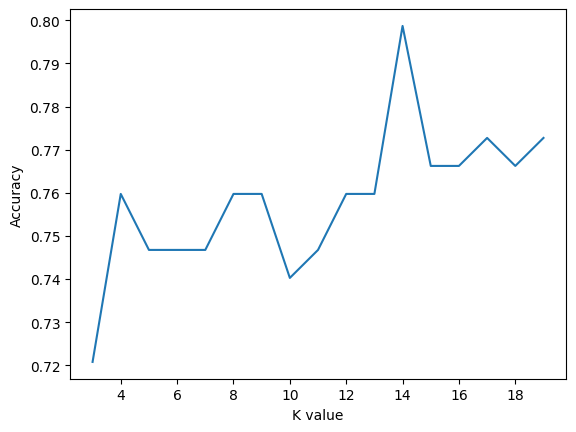

In [26]:
plt.plot(n, k_met)
plt.xlabel('K value')
plt.ylabel('Accuracy')

Selecting N = 14 as it gives the highest accuracy

In [27]:
classifier = KNeighborsClassifier(n_neighbors= 14 , metric='euclidean')
classifier.fit(x_mmscl_train, y_train)
y_pred = classifier.predict(x_mmscl_test)
accuracy_score(y_test, y_pred)

0.7987012987012987

In [28]:
confusion_matrix(y_test, y_pred)

array([[89, 10],
       [21, 34]], dtype=int64)

##### 3) SVC

In [29]:
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')


sv.fit(x_mmscl_train,y_train)
y_pred = sv.predict(x_mmscl_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

From the observed models, KNN classifier gives the better accuracy